## 练习2
在课程中，已经学习了如何用Fashion MNIST数据集训练分类器。Fashion MNIST是一个包含服装项目的数据集。还有另一个类似的数据集叫MNIST，它包含很多手写数字（0到9）的图片和标签。

编写一个MNIST分类器，让它可以训练到99%以上的准确率，并且在达到这个准确率时，就通过回调函数停止训练。

一些注意事项。
1. 它应该在小于10个epochs的情况下成功，所以把epochs改成10个也可以，但不能大过10个。
2. 当它达到99%以上时，应该打印出 "达到99%准确率，所以取消训练！"的字符串。
3. 如果你添加了任何额外的变量，请确保你使用与类中使用的变量相同的名称。

我已经为你准备了下面的代码--请完成这个程序。

In [2]:
import tensorflow as tf

# 定义callback类
class myCallBack(tf.keras.callbacks.Callback):
    """自定义的停止类

    Args:
        tf (_type_): 必须继承的类
    """
    def on_epoch_end(self, epoch,logs={}):
        """需要实现找个方法，才能停止

        Args:
            epoch (_type_): _description_
            logs (dict, optional): _description_. Defaults to {}.
        """
        if (logs.get('accuracy')>0.99):
            # 停止条件
            # print('\nReached 99% accuracy so cancell traings')
            print('\n模型准确率已达到99%，所以将停止')
            self.model.stop_training = True
# 实例化自己的回调函数
callbacks = myCallBack()

# 读取手写体数字数据
mnist = tf.keras.datasets.mnist

# 分成训练集和测试集
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 预留数据形状
print(x_train.shape)
print(y_train.shape)

# 定义模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 第一层输入层 输入的每张图片的像素为(28, 28)
    tf.keras.layers.Dense(512,activation=tf.nn.relu),      # 中间层 有512个神经元 同时指定激活函数为relu
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # 输出层需要是个类别，因为0-9共10种数字，激活函数是softmax

])
# 配置模型的优化器和损失函数
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 使用训练数据进行训练，并指定最大迭代次数为10，自动停止函数为callbacks
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])  


(60000, 28, 28)
(60000,)
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/sample - loss: 2.6857 - accuracy: 0.9062
Epoch 2/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.3357 - accuracy: 0.9365
Epoch 3/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2947 - accuracy: 0.9420s - los - ETA: 0s - loss: 0.2911 - accuracy - ETA: 0s - loss: 0.290 - ETA: 0s - loss: 0.2951 - accuracy: 0.94 - ETA: 0s - loss: 0.2946 - accuracy: 0.
Epoch 4/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2605 - accuracy: 0.9447
Epoch 5/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.2491 - accuracy: 0.9498
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2197 - accuracy: 0.9530
Epoch 7/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2053 - accuracy: 0.9562
Epoch 8/10
60000/60000 [=============================

从上面的训练过程中可以看到，比较慢，所以整体归一化到0-1之间

In [14]:
import tensorflow as tf

# 定义callback类
class myCallBack(tf.keras.callbacks.Callback):
    """自定义的停止类

    Args:
        tf (_type_): 必须继承的类
    """
    def on_epoch_end(self, epoch,logs={}):
        """需要实现找个方法，才能停止

        Args:
            epoch (_type_): _description_
            logs (dict, optional): _description_. Defaults to {}.
        """
        if (logs.get('accuracy')>0.99):
            # 停止条件
            # print('\nReached 99% accuracy so cancell traings')
            print('\n模型准确率已达到99%，所以将停止')
            self.model.stop_training = True
# 实例化自己的回调函数
callbacks = myCallBack()

# 读取手写体数字数据
mnist = tf.keras.datasets.mnist

# 分成训练集和测试集
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# 预留数据形状
print(x_train.shape)
print(y_train.shape)

# 定义模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 第一层输入层 输入的每张图片的像素为(28, 28)
    tf.keras.layers.Dense(512,activation=tf.nn.relu),      # 中间层 有512个神经元 同时指定激活函数为relu
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # 输出层需要是个类别，因为0-9共10种数字，激活函数是softmax

])
# 配置模型的优化器和损失函数
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 使用训练数据进行训练，并指定最大迭代次数为10，自动停止函数为callbacks
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])  


(60000, 28, 28)
(60000,)
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2015 - accuracy: 0.9407 - loss: 0.2251 - ac - ETA: 1s - loss: 0.2171 - ac - ETA: 0s - loss: 0.2099 
Epoch 2/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.0810 - accuracy: 0.9747
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.0526 - accuracy: 0.9834
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0376 - accuracy: 0.9879s - loss:
Epoch 5/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.0287 - accuracy: 0.9910
模型准确率已达到99%，所以将停止
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0287 - accuracy: 0.9910


In [15]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [9]:
# 说明

print(784 == 28*28)  # 每个图片都是28*28的像素
print(401920 == (784+1) * 512)  # 神经元层为 (上一层给+1) 再乘以 521个神经元
print((512+1)*10)  # 上一层的(521个神经元+ 1个bias) * 10

True
True
5130


评估训练效果-整个模型进行评估

In [18]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 94us/sample - loss: 0.0685 - accuracy: 0.9809


[0.06853834754950949, 0.9809]

如上accuracy为0.9809，比训练集的accuracy=0.9910稍差一些

测试训练结果-预测某个图片的类别

2


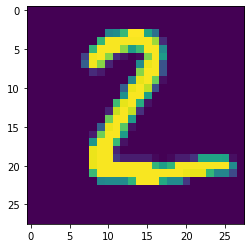

In [29]:
import matplotlib.pyplot as plt
plt.imshow(x_test[1])  # 显示图片
print(y_test[1])  # 原本的标签

In [33]:
# 使用模型预测一个图片，这个在2.1.0是可以的
model.predict([[x_test[1]/255.0]])   # 所有数字的可能性 这个在2.1.0是可以的

array([[0.05575686, 0.06803183, 0.09612951, 0.06050541, 0.08134149,
        0.2966615 , 0.10483654, 0.07256926, 0.0989917 , 0.06517592]],
      dtype=float32)

In [34]:
# 使用模型预测一个图片，这个在2.3.0就不可以
model.predict(tf.reshape(x_test[1]/255.0,(1,28,28)))   

array([[0.05575686, 0.06803183, 0.09612951, 0.06050541, 0.08134149,
        0.2966615 , 0.10483654, 0.07256926, 0.0989917 , 0.06517592]],
      dtype=float32)

In [35]:
import numpy as np
print(np.argmax(model.predict(tf.reshape(x_test[1]/255.0,(1,28,28)))))

5


In [40]:
y_train[5]

2

存在疑问如何找到最有可能数字的标签，通过5的索引数